In [110]:
#import libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from surprise import KNNBasic, Reader, model_selection, Dataset, accuracy

# Functions

In [2]:
#test_values = ['a, b, c', 'a,b', 'a,c', 'b,c', 'a', 'b', 'c']

def clean_string_list(string_list, separator):
    words = string_list.split(separator)
    clean_words = []
    for word in words:
        clean_word = word.strip()
        clean_words.append(clean_word)
    return clean_words

def get_values_in_feature_list(df, feature):
    list_unique_values = []
    for observation in df[feature]:
        words = clean_string_list(observation, ',')
        for word in words:
            if word not in list_unique_values:
                list_unique_values.append(word)
    return sorted(list(set(list_unique_values)))

def add_prefix(feature_list, prefix):
    return [prefix + x for x in feature_list]

#print(clean_string_list(test_values[0], ','))
    

# Descriptive Analysis

In [3]:
data_amazon = pd.read_csv('datasets\data_amazon.csv')
data_amazon.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Blondie,movie,"Comedy, Family",1938.0,tt0029927,6.9,886.0,"US, ZA"
1,Ariel,movie,"Comedy, Crime, Romance",1988.0,tt0094675,7.4,8755.0,JP
2,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112544.0,"AT, DE"
3,Judgment Night,movie,"Action, Crime, Drama",1993.0,tt0107286,6.6,19286.0,US
4,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315661.0,"AD, AT, CU, DE, IN, JP, SN"


In [4]:
data_apple = pd.read_csv('datasets\data_apple.csv')
data_apple.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Four Rooms,movie,Comedy,1995.0,tt0113101,6.7,112544.0,DE
1,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315661.0,"AU, CA, DE, US"
2,Citizen Kane,movie,"Drama, Mystery",1941.0,tt0033467,8.3,473008.0,"DE, GB"
3,Metropolis,movie,"Drama, Sci-Fi",1927.0,tt0017136,8.3,189486.0,GB
4,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221506.0,"BR, CL, CO, MX"


In [5]:
data_max = pd.read_csv('datasets\data_max.csv')
data_max.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,516953.0,"DK, FI, NO, SE"
1,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443687.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."
2,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,tt0338013,8.3,1103296.0,"AG, AR, BA, BB, BG, BO, BS, BZ, CL, CO, CR, CZ..."
3,A History of Violence,movie,"Action, Crime, Drama",2005.0,tt0399146,7.4,258921.0,"AG, AR, BB, BO, BR, BS, BZ, CL, CO, CR, DO, EC..."
4,2001: A Space Odyssey,movie,"Adventure, Sci-Fi",1968.0,tt0062622,8.3,734926.0,"AD, AG, AR, BB, BE, BO, BR, BS, BZ, CL, CO, CR..."


In [6]:
data_netflix = pd.read_csv('datasets\data_netflix.csv')
data_netflix.head()

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries
0,Forrest Gump,movie,"Drama, Romance",1994.0,tt0109830,8.8,2315661.0,MX
1,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,tt0119116,7.6,516953.0,"AT, CH, DE"
2,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,tt0266697,8.2,1221506.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CA, CI, CM..."
3,Jarhead,movie,"Biography, Drama, War",2005.0,tt0418763,7.0,211503.0,"AD, AE, AG, AL, AO, AR, AT, AZ, BA, BB, BG, BH..."
4,Unforgiven,movie,"Drama, Western",1992.0,tt0105695,8.2,443687.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."


We can see that all the datasets have the same features: title, type, genres, releaseYear, imdbId, imdbAverageRating, imdbNumVotes, availableCountries. 8 features in total.

In [7]:
print('amazon', data_amazon.shape)
print('apple', data_apple.shape)
print('max', data_max.shape)
print('netflix', data_netflix.shape)

amazon (66905, 8)
apple (17648, 8)
max (7017, 8)
netflix (20106, 8)


We can see that amazon it the platform that has most titles in its streaming platform

## Univariate Analysis

To help us in the univariate Analysis we will concat all the datasets in only one. Before that we create a new feature that identify the platform for any observation

In [8]:
data_amazon['platform'] = 'amazon'
data_apple['platform'] = 'apple'
data_max['platform'] = 'max'
data_netflix['platform'] = 'netflix'

In [9]:
data_all_platforms = pd.concat([data_amazon, data_apple, data_max, data_netflix])

In [10]:
data_all_platforms.shape

(111676, 9)

### Title

In [11]:
data_all_platforms['title'].info()

<class 'pandas.core.series.Series'>
Index: 111676 entries, 0 to 20105
Series name: title
Non-Null Count   Dtype 
--------------   ----- 
108701 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [12]:
print('Missing values for title:', data_all_platforms['title'].isnull().sum())

Missing values for title: 2975


In [13]:
print('All the diferents titles that we can find in the 4 platforms: ', data_all_platforms['title'].nunique())


All the diferents titles that we can find in the 4 platforms:  85649


In [14]:
print('Repeated titles:', data_all_platforms['title'].duplicated().sum())

Repeated titles: 26026


### Type

In [15]:
data_all_platforms['type'].info()

<class 'pandas.core.series.Series'>
Index: 111676 entries, 0 to 20105
Series name: type
Non-Null Count   Dtype 
--------------   ----- 
111676 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [16]:
print('List of different types:', data_all_platforms['type'].unique())

List of different types: ['movie' 'tv']


We can check that in this dataset we only have 2 types of product, movies and tv shows. 

In [17]:
type_counts = data_all_platforms['type'].value_counts()
print(type_counts)

type
movie    91309
tv       20367
Name: count, dtype: int64


In [18]:
proportion = type_counts['movie'] / type_counts['tv']
print('Proportion between movie and tv:', proportion)

Proportion between movie and tv: 4.483183581283448


### Genres

In [19]:
data_all_platforms['genres'].info()

<class 'pandas.core.series.Series'>
Index: 111676 entries, 0 to 20105
Series name: genres
Non-Null Count   Dtype 
--------------   ----- 
108803 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [20]:
print('Missing values for genres:', data_all_platforms['genres'].isnull().sum())

Missing values for genres: 2873


In [21]:
print('Number of unique genres that we can find in the 4 platforms: ', data_all_platforms['genres'].nunique())

Number of unique genres that we can find in the 4 platforms:  1657


This 1657 don't be the real unique genres, this feature is a list of diferents genres, so, in the data wrangling and tidying phase we need to solve it

### Release Year

In [22]:
data_all_platforms['releaseYear'].info()

<class 'pandas.core.series.Series'>
Index: 111676 entries, 0 to 20105
Series name: releaseYear
Non-Null Count   Dtype  
--------------   -----  
111455 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [23]:
print('missing values for releaseYear:', data_all_platforms['releaseYear'].isnull().sum())

missing values for releaseYear: 221


In [24]:
data_all_platforms['releaseYear'].describe()

count    111455.000000
mean       2008.480795
std          17.928578
min        1902.000000
25%        2005.000000
50%        2015.000000
75%        2020.000000
max        2026.000000
Name: releaseYear, dtype: float64

We can see the oldest movie or tv show is dated in 1902, and the most modern is for 2026.

In [25]:
print('Number of unique release years:', data_all_platforms['releaseYear'].nunique())
print('List of years:', sorted(data_all_platforms['releaseYear'].unique()))

Number of unique release years: 121
List of years: [1902.0, 1903.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1913.0, 1914.0, 1915.0, 1916.0, 1917.0, 1918.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0, 2015.0, 2016.0, 2017.0, 2018.0, 2019.0, 2020.0, 2021.0, 2022.0, 2023.0, 2024

In [26]:
data_all_platforms['releaseYear'].value_counts()

releaseYear
2022.0    7495
2019.0    6975
2021.0    6827
2018.0    6588
2023.0    6408
          ... 
1911.0       1
1908.0       1
2026.0       1
1903.0       1
1909.0       1
Name: count, Length: 121, dtype: int64

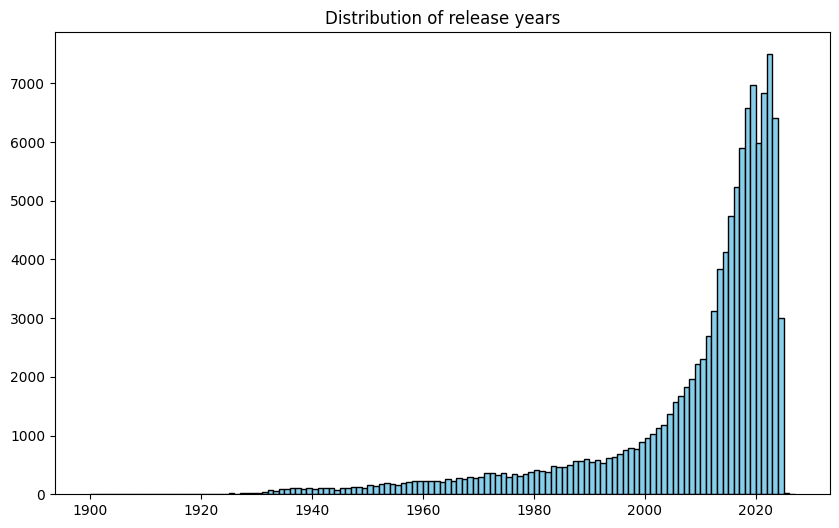

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(data_all_platforms['releaseYear'], bins=range(1900, 2028, 1), color='skyblue', edgecolor='black')
plt.title('Distribution of release years')
plt.show()

We can see a skeewed distribution for the values in the feature releaseYear, the most films and shows included in these platforms were produced after 2000

### IMDB Id

In [28]:
data_all_platforms['imdbId'].info()

<class 'pandas.core.series.Series'>
Index: 111676 entries, 0 to 20105
Series name: imdbId
Non-Null Count   Dtype 
--------------   ----- 
102851 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [29]:
print('Missing values for imdbId:', data_all_platforms['imdbId'].isnull().sum())

Missing values for imdbId: 8825


In [30]:
print('The number of unique imdbId:', data_all_platforms['imdbId'].nunique())

The number of unique imdbId: 87359


Is strange because in the first moment I could thing that the values of missings and unique values would be similar than title, but not, in the EDA analysis we will dive more deeply in this question

### IMDB Average Rating

In [31]:
data_all_platforms['imdbAverageRating'].info()

<class 'pandas.core.series.Series'>
Index: 111676 entries, 0 to 20105
Series name: imdbAverageRating
Non-Null Count   Dtype  
--------------   -----  
100089 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [32]:
print('Missing values for imdbAverageRating:', data_all_platforms['imdbAverageRating'].isnull().sum())

Missing values for imdbAverageRating: 11587


In [33]:
data_all_platforms['imdbAverageRating'].describe()

count    100089.000000
mean          6.148958
std           1.298042
min           1.000000
25%           5.400000
50%           6.300000
75%           7.100000
max           9.900000
Name: imdbAverageRating, dtype: float64

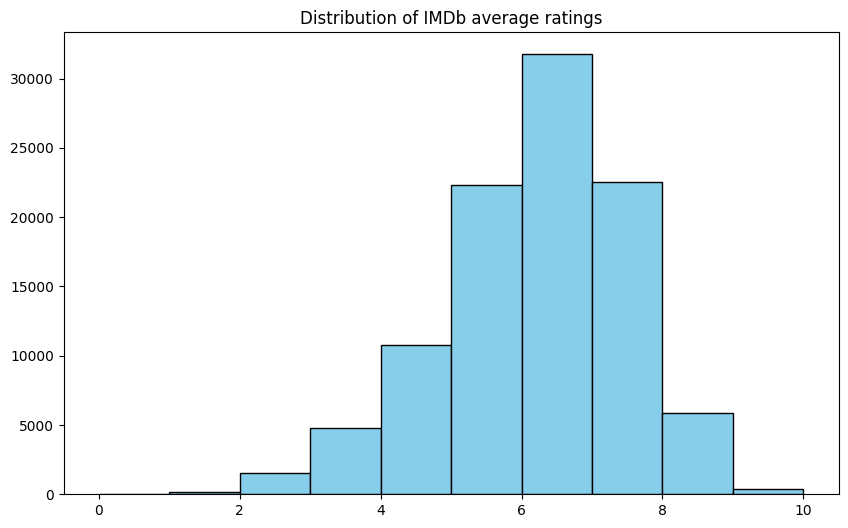

In [34]:
plt.figure(figsize=(10, 6))
plt.hist(data_all_platforms['imdbAverageRating'], bins=range(0, 11, 1), color='skyblue', edgecolor='black')
plt.title('Distribution of IMDb average ratings')
plt.show()

We can see a normal distribution around the imdb ratings, no surprises, this has all the sense.

### IMDB Num Votes

In [35]:
data_all_platforms['imdbNumVotes'].info()

<class 'pandas.core.series.Series'>
Index: 111676 entries, 0 to 20105
Series name: imdbNumVotes
Non-Null Count   Dtype  
--------------   -----  
100089 non-null  float64
dtypes: float64(1)
memory usage: 1.7 MB


In [36]:
print('missing values for imdbNumVotes:', data_all_platforms['imdbNumVotes'].isnull().sum())

missing values for imdbNumVotes: 11587


In [37]:
data_all_platforms['imdbNumVotes'].describe()

count    1.000890e+05
mean     2.175906e+04
std      9.911465e+04
min      5.000000e+00
25%      1.440000e+02
50%      7.100000e+02
75%      4.390000e+03
max      2.959184e+06
Name: imdbNumVotes, dtype: float64

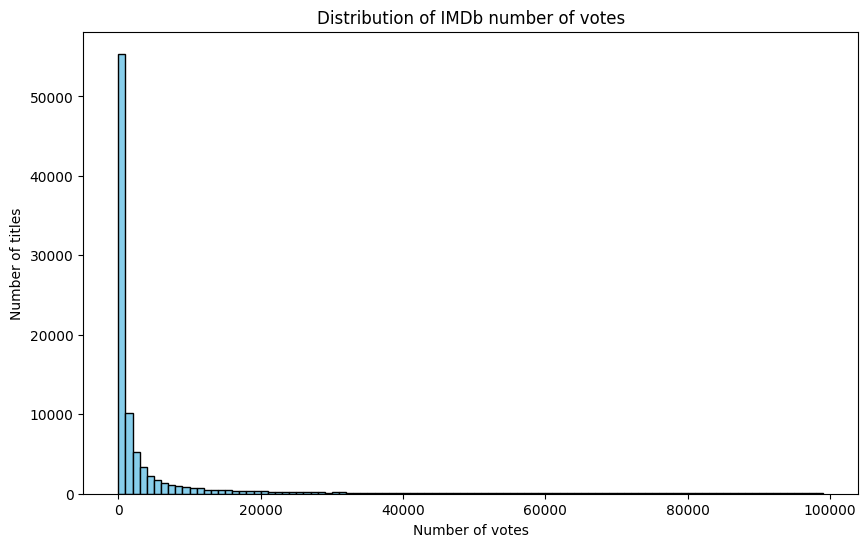

In [38]:
plt.figure(figsize=(10, 6))
plt.hist(data_all_platforms['imdbNumVotes'], bins=range(0, 100000, 1000), color='skyblue', edgecolor='black')
plt.title('Distribution of IMDb number of votes')
plt.xlabel('Number of votes')
plt.ylabel('Number of titles')
plt.show()

We can see a skeewed histogram, when the most part of the tv show and movies don't have votes or they have a few.

### Available Countries

In [39]:
data_all_platforms['availableCountries'].info()

<class 'pandas.core.series.Series'>
Index: 111676 entries, 0 to 20105
Series name: availableCountries
Non-Null Count   Dtype 
--------------   ----- 
111676 non-null  object
dtypes: object(1)
memory usage: 1.7+ MB


In [40]:
print('Number of unique available countries:', data_all_platforms['availableCountries'].nunique())

Number of unique available countries: 19564


We need to understand that the values of this feature are a list of values, this 19564 are combinations of countries. When we will transformig the data we will solve this problem.

# Data Wrangling and Tidying

## Missing Data

In [41]:
data_all_platforms.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111676 entries, 0 to 20105
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   title               108701 non-null  object 
 1   type                111676 non-null  object 
 2   genres              108803 non-null  object 
 3   releaseYear         111455 non-null  float64
 4   imdbId              102851 non-null  object 
 5   imdbAverageRating   100089 non-null  float64
 6   imdbNumVotes        100089 non-null  float64
 7   availableCountries  111676 non-null  object 
 8   platform            111676 non-null  object 
dtypes: float64(3), object(6)
memory usage: 8.5+ MB


In [42]:
print('Missing data in the dataset:', data_all_platforms.isnull().sum()/len(data_all_platforms))

Missing data in the dataset: title                 0.026640
type                  0.000000
genres                0.025726
releaseYear           0.001979
imdbId                0.079023
imdbAverageRating     0.103756
imdbNumVotes          0.103756
availableCountries    0.000000
platform              0.000000
dtype: float64


### Genre

We have a 2.5% of missing values, it's a relative little number of missings. Let's see what type of missing values there are (MCAR, MAR, MNAR)

In [43]:
missing_genre = data_all_platforms[data_all_platforms['genres'].isnull()]
missing_genre

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries,platform
4784,A Aa E Ee,movie,NaN,2009.0,NaN,NaN,NaN,"DK, FI, IN, IS, NO, SE",amazon
6913,Divinyls Live,movie,NaN,1993.0,NaN,NaN,NaN,AU,amazon
8480,Lost in the Dark,movie,NaN,2007.0,NaN,NaN,NaN,US,amazon
8799,Siste trikk,movie,NaN,2024.0,NaN,NaN,NaN,"AT, DE",amazon
9019,El Arte De La Guerra,movie,NaN,2024.0,NaN,NaN,NaN,IN,amazon
...,...,...,...,...,...,...,...,...,...
20070,NaN,tv,NaN,2024.0,NaN,NaN,NaN,US,netflix
20081,NaN,tv,NaN,2024.0,NaN,NaN,NaN,JP,netflix
20102,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"HK, ID, IN, KR, MY, PH, SG, TH",netflix
20103,NaN,tv,NaN,2024.0,NaN,NaN,NaN,"AL, AO, AU, AZ, BA, BB, BG, BM, BS, BY, BZ, CA...",netflix


In [44]:
missing_genre.isnull().sum()/len(missing_genre)

title                 0.354682
type                  0.000000
genres                1.000000
releaseYear           0.051862
imdbId                0.916464
imdbAverageRating     0.948138
imdbNumVotes          0.948138
availableCountries    0.000000
platform              0.000000
dtype: float64

We can check that all the missing genre values also have a high quantity of missing values in imdbId, imdbAverageRating and imdbNumVotes. Also have a 35% title missing. I thing that this value is MCAR and we can drop all the missing values beucase also clean other features.

In [45]:
# Drop rows with missing values in the 'genres' column
data_all_platforms = data_all_platforms.dropna(subset=['genres'])
print('Missing data in the dataset:', data_all_platforms.isnull().sum()/len(data_all_platforms))

Missing data in the dataset: title                 0.017977
type                  0.000000
genres                0.000000
releaseYear           0.000662
imdbId                0.056910
imdbAverageRating     0.081459
imdbNumVotes          0.081459
availableCountries    0.000000
platform              0.000000
dtype: float64


### Release Year

In [46]:
print('The percentatge of missing values for releaseYear is: ', (data_all_platforms['releaseYear'].isnull().sum()/len(data_all_platforms))*100)
print('The number of missing values for releaseYear is: ', data_all_platforms['releaseYear'].isnull().sum())

The percentatge of missing values for releaseYear is:  0.06617464591968972
The number of missing values for releaseYear is:  72


In [47]:
missing_releaseYear = data_all_platforms[data_all_platforms['releaseYear'].isnull()]
missing_releaseYear

,title,type,genres,releaseYear,imdbId,imdbAverageRating,imdbNumVotes,availableCountries,platform
35443,Tom Mabe: Dysfunction Junction,movie,Comedy,NaN,NaN,NaN,NaN,"CM, GB, GG, GH, IE, KE, NG, UG, ZA",amazon
35719,Scott Novotny: A Trip to Goofyville,movie,Comedy,NaN,NaN,NaN,NaN,"CM, GH, IE, KE, NG, UG, ZA",amazon
36294,Brian Moote: Getting Schooled,movie,Comedy,NaN,NaN,NaN,NaN,"CM, GB, GG, GH, IE, KE, NG, UG, ZA",amazon
39505,"Mark Poolos: One wife, two daughters, and zero...",movie,"Documentary, Comedy",NaN,NaN,NaN,NaN,"CM, GH, IE, KE, NG, UG, ZA",amazon
40208,Most Dangerous Game,movie,Comedy,NaN,tt10274176,NaN,NaN,"AD, AG, AL, AO, AR, AT, AU, BA, BB, BE, BF, BH...",amazon
...,...,...,...,...,...,...,...,...,...
19385,NaN,tv,"Drama, Crime, Mystery",NaN,NaN,NaN,NaN,CA,netflix
19661,NaN,tv,Animation,NaN,NaN,NaN,NaN,"AD, AE, AG, AL, AO, AR, AT, AU, BA, BB, BE, BG...",netflix
19798,NaN,tv,Action & Adventure,NaN,NaN,NaN,NaN,KR,netflix
19997,NaN,tv,Drama,NaN,NaN,NaN,NaN,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE...",netflix


In [48]:
missing_releaseYear.isnull().sum()/len(missing_releaseYear)

title                 0.680556
type                  0.000000
genres                0.000000
releaseYear           1.000000
imdbId                0.902778
imdbAverageRating     1.000000
imdbNumVotes          1.000000
availableCountries    0.000000
platform              0.000000
dtype: float64

Is the same case that genre, seems to be a MCAR missing type, we proceded to drop all the missing values 

In [49]:
data_all_platforms = data_all_platforms.dropna(subset=['releaseYear'])
print('Missing data in the dataset:', data_all_platforms.isnull().sum()/len(data_all_platforms))

Missing data in the dataset: title                 0.017539
type                  0.000000
genres                0.000000
releaseYear           0.000000
imdbId                0.056350
imdbAverageRating     0.080851
imdbNumVotes          0.080851
availableCountries    0.000000
platform              0.000000
dtype: float64


### imdbID

In [50]:
print('The percentatge of missing values for releaseYear is: ', (data_all_platforms['imdbId'].isnull().sum()/len(data_all_platforms))*100)
print('The number of missing values for releaseYear is: ', data_all_platforms['imdbId'].isnull().sum())

The percentatge of missing values for releaseYear is:  5.635007495562443
The number of missing values for releaseYear is:  6127


This feature doesn't have any importance for this analysis, we can drop the column

In [51]:
data_all_platforms = data_all_platforms.drop('imdbId', axis=1)
print('Missing data in the dataset:', data_all_platforms.isnull().sum()/len(data_all_platforms))

Missing data in the dataset: title                 0.017539
type                  0.000000
genres                0.000000
releaseYear           0.000000
imdbAverageRating     0.080851
imdbNumVotes          0.080851
availableCountries    0.000000
platform              0.000000
dtype: float64


### imdbAverageRating & imdbAverageRating

In [52]:
print('The percentatge of missing values for releaseYear is: ', (data_all_platforms['imdbAverageRating'].isnull().sum()/len(data_all_platforms))*100)
print('The number of missing values for releaseYear is: ', data_all_platforms['imdbAverageRating'].isnull().sum())

The percentatge of missing values for releaseYear is:  8.085090728495095
The number of missing values for releaseYear is:  8791


In [53]:
missing_imdbAverageRating = data_all_platforms[data_all_platforms['imdbAverageRating'].isnull()]
missing_imdbAverageRating

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries,platform
1319,Rounds,movie,Short,2007.0,NaN,NaN,NZ,amazon
2874,Futureproof,movie,Short,2005.0,NaN,NaN,AU,amazon
3289,Turbo,movie,Documentary,2008.0,NaN,NaN,"AO, BE, BF, BM, BY, BZ, CD, CH, CI, CM, GF, GH...",amazon
3290,Realtime,movie,Documentary,2007.0,NaN,NaN,"AG, AO, AR, BB, BE, BF, BM, BO, BS, BY, BZ, CD...",amazon
3888,Crusty Demons 14: A Bloodthirsty Saga,movie,Action,2008.0,NaN,NaN,US,amazon
...,...,...,...,...,...,...,...,...
20092,NaN,tv,Reality,2024.0,NaN,NaN,"HK, IN, PH, PK, SG, TW",netflix
20096,NaN,tv,"Reality, Family",2024.0,NaN,NaN,KR,netflix
20097,After School Doctor,tv,Drama,2024.0,NaN,NaN,"JP, LI, MC",netflix
20098,NaN,tv,Kids,2024.0,NaN,NaN,KR,netflix


We checked that all the missing values for imdbAverageRating are the same than imdbNumVotes. This happens because these are films and tv shows that don't have any vote so they also haven't average rating. The missing of average is estructuraly because it's not possible to have a rate if you don't have votes. We will check if the dataset data_all_platforms has observations in the feature imdbNumVotes with 0 value

In [54]:
num_zero_num_votes = data_all_platforms[data_all_platforms['imdbNumVotes'] == 0].sum()
num_zero_num_votes

title                   0
type                    0
genres                  0
releaseYear           0.0
imdbAverageRating     0.0
imdbNumVotes          0.0
availableCountries      0
platform                0
dtype: object

So, we can change the missing values in imdbNumVotes as a 0, we use a mode technique to fill the imdbAverageRating

In [55]:
data_all_platforms = data_all_platforms.fillna({'imdbAverageRating': data_all_platforms['imdbAverageRating'].mode()[0]})
data_all_platforms = data_all_platforms.fillna({'imdbNumVotes': 0})
print('Missing data in the dataset:', data_all_platforms.isnull().sum()/len(data_all_platforms))

Missing data in the dataset: title                 0.017539
type                  0.000000
genres                0.000000
releaseYear           0.000000
imdbAverageRating     0.000000
imdbNumVotes          0.000000
availableCountries    0.000000
platform              0.000000
dtype: float64


## Transform Data

### Genre

In [56]:
genre_values = get_values_in_feature_list(data_all_platforms, 'genres')
print('List of genres:', genre_values)
print('Number of genres:', len(genre_values))

List of genres: ['Action', 'Action & Adventure', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Film-Noir', 'Game-Show', 'History', 'Horror', 'Kids', 'Music', 'Musical', 'Mystery', 'News', 'Reality', 'Reality-TV', 'Romance', 'Sci-Fi', 'Sci-Fi & Fantasy', 'Science Fiction', 'Short', 'Soap', 'Sport', 'TV Movie', 'Talk', 'Talk-Show', 'Thriller', 'War', 'War & Politics', 'Western']
Number of genres: 37


Now we know that we have 37 different types of genres. We need to transform this information in a way that our future model can manage. We create a one hot encoder whit these type values, because we have a lot of categorical types, we will use a binary encoding

In [57]:
data_all_platforms['genres'] = data_all_platforms['genres'].apply(lambda x: x.replace(' ', ''))
data_all_platforms_one_hot_genres = data_all_platforms['genres'].str.get_dummies(sep=',')
#data_all_platforms_one_hot_genres.columns = ['genre_' + column for column in data_all_platforms_one_hot_genres.columns]
data_all_platforms_extended = pd.concat([data_all_platforms, data_all_platforms_one_hot_genres], axis=1)

### Available Countries

In [58]:
countries_values = get_values_in_feature_list(data_all_platforms, 'availableCountries')
print('List of countries:', countries_values)
print('Number of countries:', len(countries_values))

List of countries: ['AD', 'AE', 'AG', 'AL', 'AO', 'AR', 'AT', 'AU', 'AZ', 'BA', 'BB', 'BE', 'BF', 'BG', 'BH', 'BM', 'BO', 'BR', 'BS', 'BY', 'BZ', 'CA', 'CD', 'CH', 'CI', 'CL', 'CM', 'CO', 'CR', 'CU', 'CV', 'CY', 'CZ', 'DE', 'DK', 'DO', 'DZ', 'EC', 'EE', 'EG', 'ES', 'FI', 'FJ', 'FR', 'GB', 'GF', 'GG', 'GH', 'GI', 'GQ', 'GR', 'GT', 'GY', 'HK', 'HN', 'HR', 'HU', 'ID', 'IE', 'IL', 'IN', 'IQ', 'IS', 'IT', 'JM', 'JO', 'JP', 'KE', 'KR', 'KW', 'LB', 'LC', 'LI', 'LT', 'LU', 'LV', 'LY', 'MA', 'MC', 'MD', 'ME', 'MG', 'MK', 'ML', 'MT', 'MU', 'MW', 'MX', 'MY', 'MZ', 'NE', 'NG', 'NI', 'NL', 'NO', 'NZ', 'OM', 'PA', 'PE', 'PF', 'PG', 'PH', 'PK', 'PL', 'PS', 'PT', 'PY', 'QA', 'RO', 'RS', 'RU', 'SA', 'SC', 'SE', 'SG', 'SI', 'SK', 'SM', 'SN', 'SV', 'TC', 'TD', 'TH', 'TN', 'TR', 'TT', 'TW', 'TZ', 'UA', 'UG', 'US', 'UY', 'VA', 'VE', 'YE', 'ZA', 'ZM', 'ZW']
Number of countries: 138


We follow the next strategy than the last transformation data with genre feature

In [59]:
data_all_platforms['availableCountries'] = data_all_platforms['availableCountries'].apply(lambda x: x.replace(' ', ''))
data_all_platforms_one_hot_countries = data_all_platforms['availableCountries'].str.get_dummies(sep=',')
data_all_platforms_one_hot_countries.columns = [pycountry.countries.get(alpha_2=column).name for column in data_all_platforms_one_hot_countries.columns]
data_all_platforms_extended = pd.concat([data_all_platforms_extended, data_all_platforms_one_hot_countries], axis=1)

# EDA

## Bivariate analysis

#### Countries - Title

What countries have more titles? And less?

In [60]:
countries_values = [pycountry.countries.get(alpha_2=country).name if pycountry.countries.get(alpha_2=country) else country for country in countries_values]

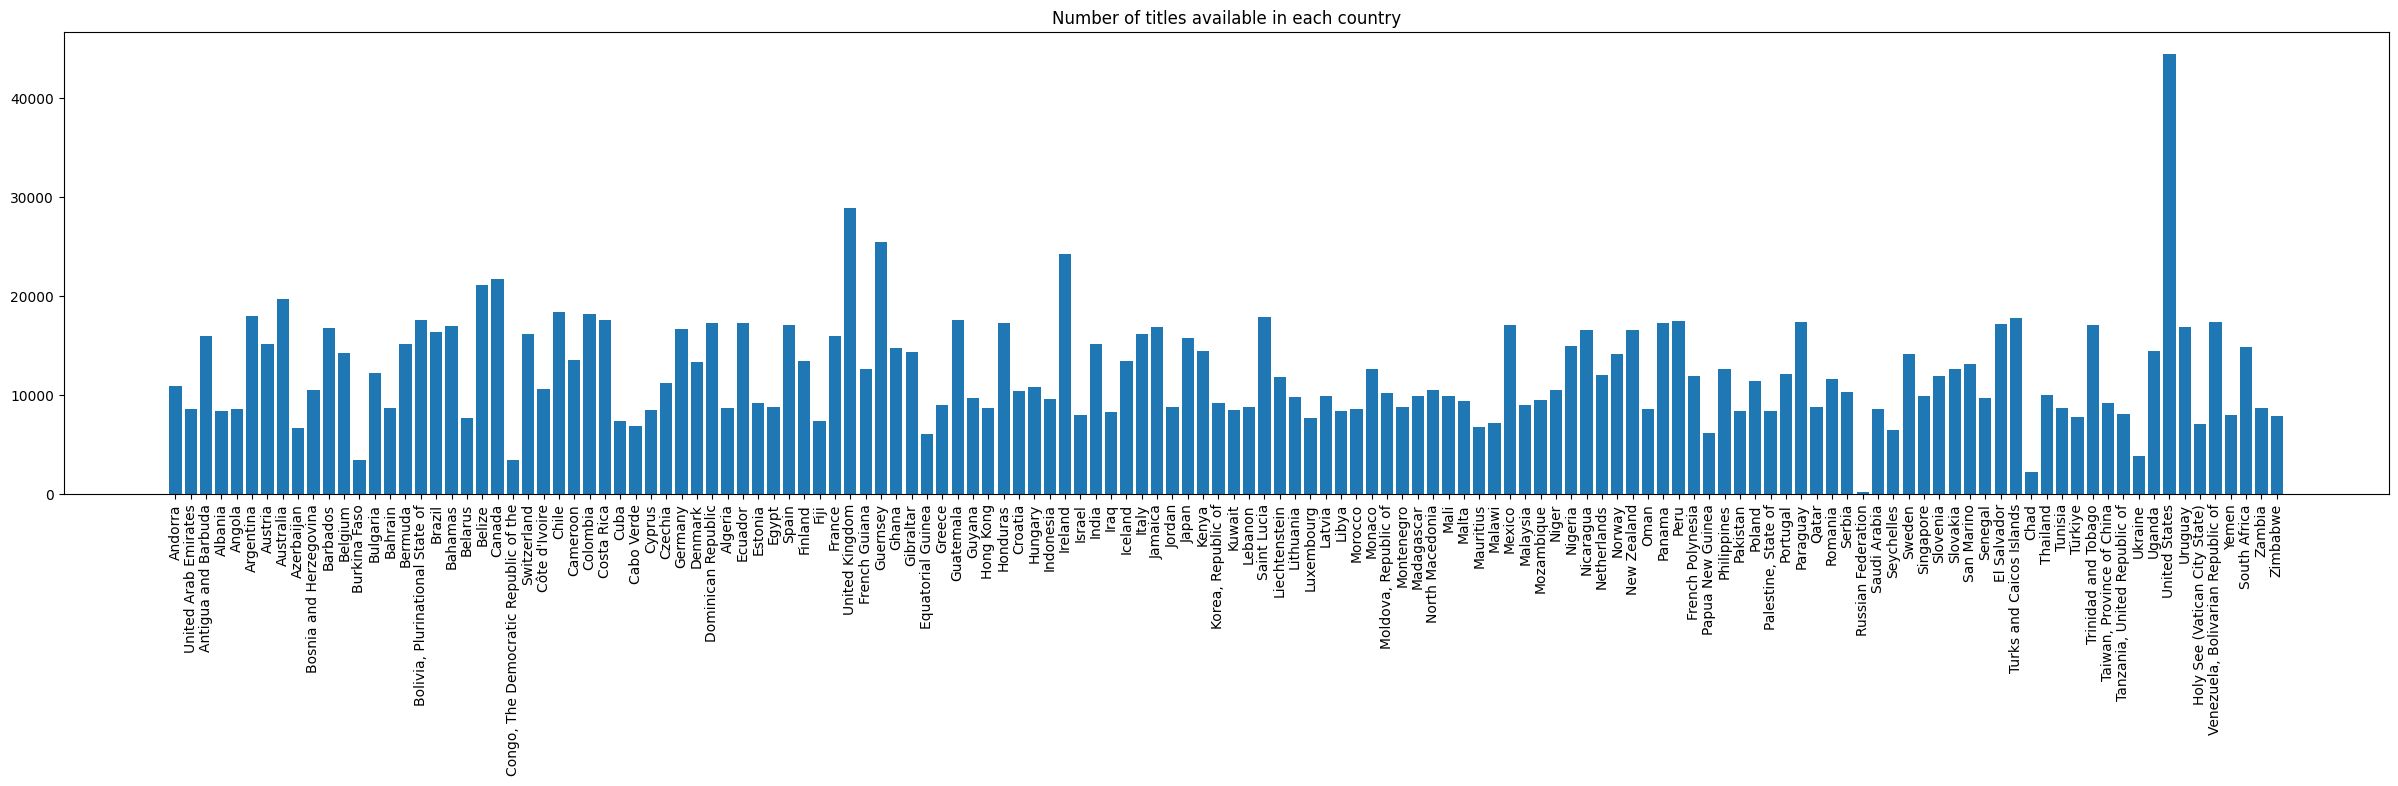

In [61]:
plt.figure(figsize=(30, 6))
plt.bar(countries_values, data_all_platforms_extended[countries_values].sum())
plt.xticks(rotation=90)
plt.title('Number of titles available in each country')
plt.show()

In [62]:
sum_title_per_country = data_all_platforms_extended[countries_values].sum()
print('The 5 countries with the most titles available are: \n', sum_title_per_country.sort_values(ascending=False).head())
print('The 5 countries with the least titles available are: \n', sum_title_per_country.sort_values(ascending=False).tail())

The 5 countries with the most titles available are: 
 United States     44447
United Kingdom    28858
Guernsey          25494
Ireland           24225
Canada            21768
dtype: int64
The 5 countries with the least titles available are: 
 Ukraine                                  3804
Burkina Faso                             3482
Congo, The Democratic Republic of the    3479
Chad                                     2248
Russian Federation                        248
dtype: int64


- This values have all the sense, because, nou with the ukranian war all the sanctions to the Russian Federation avoid that this country can consume west multimedia products  
- Inside the list of the countries with more titles, all the countries have the english as the official language, and it's probabily that in the filmaker industry the most power industry is the American (US)
- It's surprising that India doesn't have more title, because it's a country with a veure big filmaker industry (Bollywood), will be interesting analize how many titles in this dataset are produced in India

#### Genre - Release Year

What are the genres more used? Can be any relation between the number of titles with a genre in concret with the year when they were produced?

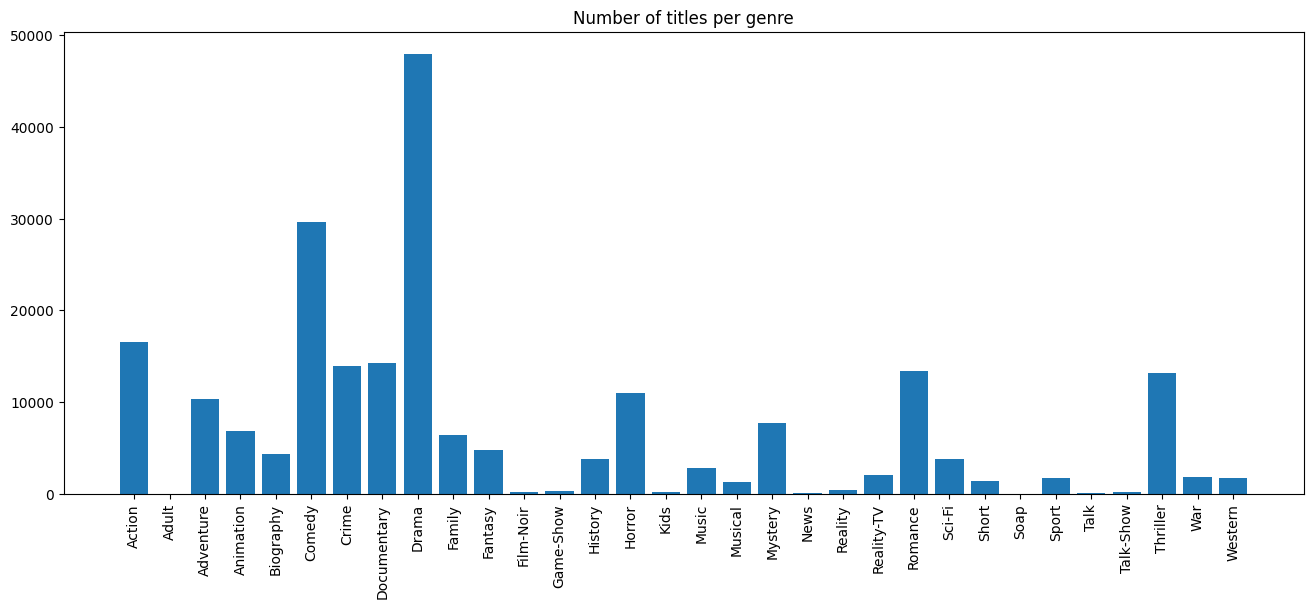

In [63]:
# Filter genre_values to include only those genres that are present in the columns of data_all_platforms_extended
valid_genres = [genre for genre in genre_values if genre in data_all_platforms_extended.columns]

plt.figure(figsize=(16, 6))
plt.bar(valid_genres, data_all_platforms_extended[valid_genres].sum())
plt.xticks(rotation=90)
plt.title('Number of titles per genre')
plt.show()

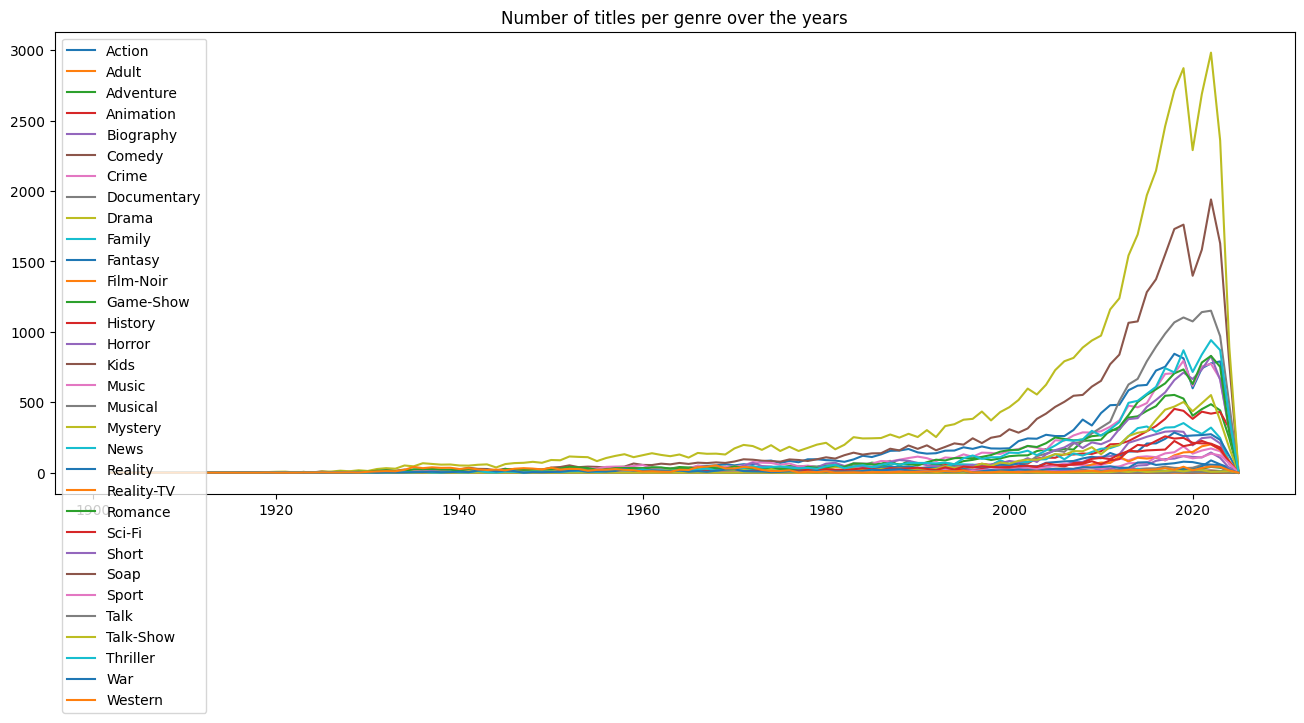

In [64]:
plt.figure(figsize=(16, 6))
for genre in valid_genres:
    plt.plot(data_all_platforms_extended.groupby('releaseYear')[genre].sum(), label=genre)
plt.legend()
plt.title('Number of titles per genre over the years')
plt.show()

We can't identify any relation between release year and genre, but we can verify that the two genres that have grown the most in recent years are Comedy and Kids. Also, we can see that in 2019 the production of films and TV shows decreased significantly due to COVID-19.

In [65]:
# Melt the dataframe to reshape it
melted_df = data_all_platforms_extended.melt(id_vars=['releaseYear'], value_vars=valid_genres, var_name='Genre', value_name='Count')

# Filter out rows where Count is 0
melted_df = melted_df[melted_df['Count'] != 0]

# Create the crosstab
crosstab_genre_year = pd.crosstab(melted_df['releaseYear'], melted_df['Genre'])
print(crosstab_genre_year)

Genre        Action  Adult  Adventure  Animation  Biography  Comedy  Crime  \
releaseYear                                                                  
1902.0            2      0          2          0          0       2      0   
1903.0            0      0          0          0          0       0      0   
1906.0            0      0          0          0          0       1      0   
1908.0            0      0          0          0          0       0      0   
1909.0            0      0          0          0          0       0      0   
...             ...    ...        ...        ...        ...     ...    ...   
2021.0          741      0        451        433        245    1583    754   
2022.0          776      0        486        419        252    1940    773   
2023.0          790      2        442        431        208    1628    666   
2024.0          390      1        244        315         78     775    295   
2025.0            3      0          0          0          0     

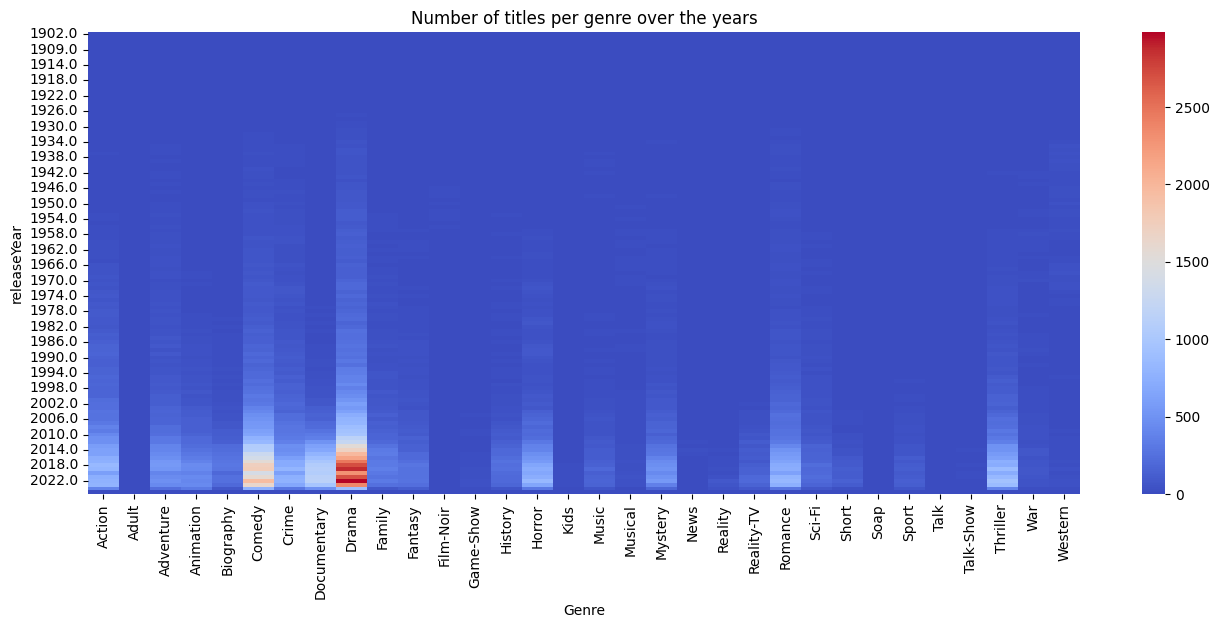

In [66]:
plt.figure(figsize=(16, 6))
sns.heatmap(crosstab_genre_year, cmap='coolwarm')
plt.title('Number of titles per genre over the years')
plt.show()

#### Platform - Type

In [67]:
data_all_platforms.select_dtypes(np.float_).corr()

,releaseYear,imdbAverageRating,imdbNumVotes
releaseYear,1.000000,-0.038641,-0.028723
imdbAverageRating,-0.038641,1.000000,0.182066
imdbNumVotes,-0.028723,0.182066,1.000000


Doesn't exist any correlation among the numerical values of our dataset

In [68]:
crosstab_type_plat = pd.crosstab(data_all_platforms['type'], data_all_platforms['platform'])
print(crosstab_type_plat)

platform  amazon  apple   max  netflix
type                                  
movie      57311  13197  3610    15360
tv          7748   3842  3172     4491


<Figure size 1000x600 with 0 Axes>

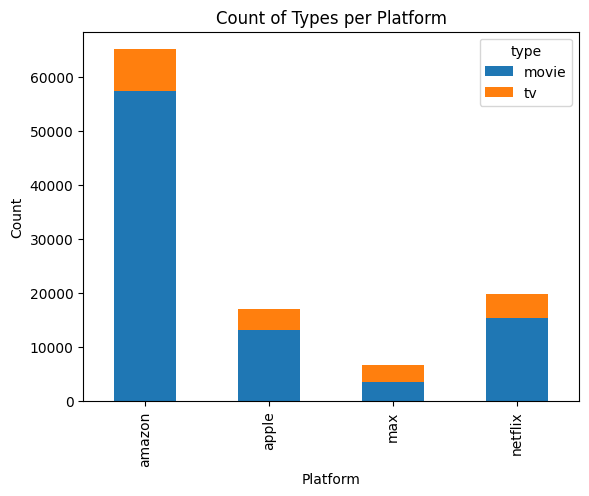

In [69]:
type_counts_per_platform = data_all_platforms.groupby(['platform', 'type']).size().unstack().fillna(0)
plt.figure(figsize=(10, 6))
type_counts_per_platform.plot(kind='bar', stacked=True)
plt.title('Count of Types per Platform')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()


#### Platfrom - Genre

In [70]:
# Melt the DataFrame to reshape it
melted_genres = data_all_platforms_extended.melt(id_vars=['platform'], value_vars=valid_genres, var_name='genre', value_name='count')

# Filter out rows where count is 0
melted_genres = melted_genres[melted_genres['count'] != 0]

# Create the crosstab
crosstab_genre_plat = pd.crosstab(melted_genres['genre'], melted_genres['platform'])
print(crosstab_genre_plat)

platform     amazon  apple   max  netflix
genre                                    
Action        10137   2113   906     3354
Adult            11      2     1        1
Adventure      5980   1166   897     2318
Animation      3681    489   768     1944
Biography      2341    692   341      938
Comedy        16395   4590  1574     7127
Crime          7478   2524   977     2907
Documentary    8406   2371  1324     2130
Drama         28316   7978  2327     9369
Family         3802   1124   355     1090
Fantasy        2870    634   291      963
Film-Noir       157     26     4       11
Game-Show       119     71    80       85
History        2134    740   228      709
Horror         7759   1679   332     1203
Kids             67      8    12       88
Music          1730    370   102      585
Musical         762    226    38      208
Mystery        4358   1546   399     1391
News             90     21    16       10
Reality          77     42   200       64
Reality-TV      576    348   794  

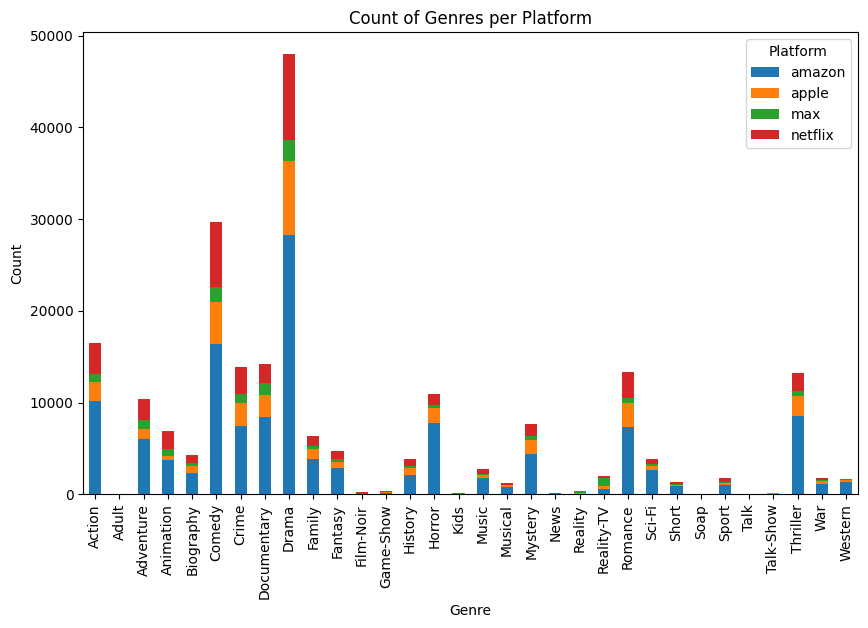

In [71]:
crosstab_genre_plat.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Genres per Platform')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.legend(title='Platform')
plt.show()

#### Platform - IMDB Average Rating

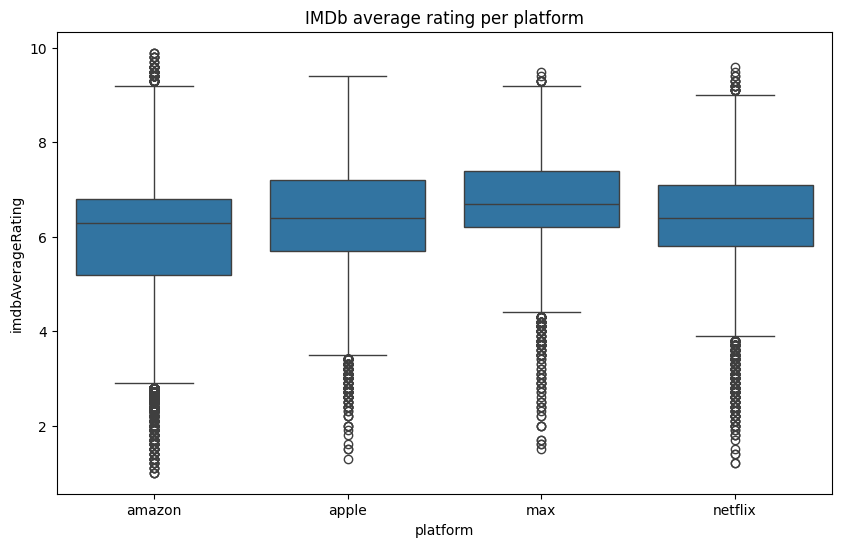

In [72]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='imdbAverageRating', data=data_all_platforms)
plt.title('IMDb average rating per platform')
plt.show()

In [73]:
data_all_platforms.groupby('platform')['imdbAverageRating'].mean()

platform
amazon     5.988721
apple      6.384723
max        6.683663
netflix    6.398252
Name: imdbAverageRating, dtype: float64

We can see that MAX platform offer the most valuable content according to the consumer. Now we want to apply ANOVA to check if these differences are staticaly significant. 

In [74]:
data_all_platforms.groupby('platform')['imdbAverageRating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
amazon,65059.0,5.988721,1.312979,1.0,5.2,6.3,6.8,9.9
apple,17039.0,6.384723,1.121723,1.3,5.7,6.4,7.2,9.4
max,6782.0,6.683663,1.027198,1.5,6.2,6.7,7.4,9.5
netflix,19851.0,6.398252,1.061423,1.2,5.8,6.4,7.1,9.6


In [75]:
amazon_average_rating = data_all_platforms[data_all_platforms['platform'] == 'amazon']['imdbAverageRating']
apple_average_rating = data_all_platforms[data_all_platforms['platform'] == 'apple']['imdbAverageRating']
max_average_rating = data_all_platforms[data_all_platforms['platform'] == 'max']['imdbAverageRating']
netflix_average_rating = data_all_platforms[data_all_platforms['platform'] == 'netflix']['imdbAverageRating']

fstat, pval = f_oneway(amazon_average_rating, apple_average_rating, max_average_rating, netflix_average_rating)
print('F-statistic:', fstat)
print('P-value:', pval)

F-statistic: 1276.9695234120504
P-value: 0.0


In [76]:
tukey_results = pairwise_tukeyhsd(data_all_platforms['imdbAverageRating'], data_all_platforms['platform'], alpha=0.05)
print('Tukey results:', tukey_results)

Tukey results:  Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1  group2 meandiff p-adj   lower   upper  reject
-----------------------------------------------------
amazon   apple    0.396    0.0  0.3689  0.4231   True
amazon     max   0.6949    0.0  0.6548  0.7351   True
amazon netflix   0.4095    0.0   0.384   0.435   True
 apple     max   0.2989    0.0  0.2538  0.3441   True
 apple netflix   0.0135 0.7153 -0.0193  0.0464  False
   max netflix  -0.2854    0.0 -0.3297 -0.2412   True
-----------------------------------------------------


- After apply the ANOVA and Tukey test we can determina that amazon average rating is staticaly significant different than netflix, max and apple
- Also we can determine that max is staticaly significant different to netflix and apple
- Finally we can determine that apple and netflix doesn't have any staticaly significant differency between them


- We can determine objectivaly that max have the better titles (according to the votes of the consumers)
- Apple and netflix have a similar quality in their titles
- Amazon has the worst titles

#### Country - Genre

In [ ]:
country_dataset = data_all_platforms_extended[countries_values]
country_dataset



,Andorra,United Arab Emirates,Antigua and Barbuda,Albania,Angola,Argentina,Austria,Australia,Azerbaijan,Bosnia and Herzegovina,...,Ukraine,Uganda,United States,Uruguay,Holy See (Vatican City State),"Venezuela, Bolivarian Republic of",Yemen,South Africa,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20099,0,0,1,1,1,1,0,1,1,1,...,0,1,1,1,0,1,0,1,1,1
20100,1,1,0,1,1,1,1,1,1,1,...,1,1,1,1,0,1,1,1,1,1


In [78]:
genre_dataset = data_all_platforms_extended[valid_genres]
genre_dataset

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Romance,Sci-Fi,Short,Soap,Sport,Talk,Talk-Show,Thriller,War,Western
0,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20097,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
20098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
# Combine the datasets by concatenating along columns
combined_df = pd.concat([country_dataset, genre_dataset], axis=1)

# Melt the DataFrame to long format to create a crosstab
melted_df = combined_df.reset_index().melt(id_vars='index', var_name='Category', value_name='Presence')

# Filter out rows where Presence is 0 
melted_df = melted_df[melted_df['Presence'] == 1]

# Split the 'Category' into 'Type' and 'Name'
melted_df['Type'] = melted_df['Category'].apply(lambda x: 'Country' if x in country_dataset.columns else 'Genre')
melted_df['Name'] = melted_df['Category']

# Separate the countries and genres
countries = melted_df[melted_df['Type'] == 'Country']
genres = melted_df[melted_df['Type'] == 'Genre']

# Merge the data based on the index to get a DataFrame with both country and genre information
merged_df = pd.merge(countries, genres, on='index')
merged_df = merged_df.fillna(0)

# Create the crosstab
crosstab_genre_country = pd.crosstab(merged_df['Name_x'], merged_df['Name_y'], values=merged_df['Presence_y'], aggfunc='sum', dropna=False)

print("Crosstab of Countries and Genres:")
print(crosstab_genre_country)


Crosstab of Countries and Genres:
Name_y                             Action  Adult  Adventure  Animation  \
Name_x                                                                   
Albania                            3545.0    1.0     2247.0     1354.0   
Algeria                            3846.0    1.0     2325.0     1373.0   
Andorra                            5321.0    NaN     3526.0     1817.0   
Angola                             3516.0    1.0     2251.0     1452.0   
Antigua and Barbuda                7339.0    1.0     4724.0     2666.0   
...                                   ...    ...        ...        ...   
Uruguay                            8212.0    NaN     5409.0     3093.0   
Venezuela, Bolivarian Republic of  8480.0    NaN     5649.0     3290.0   
Yemen                              3438.0    NaN     2104.0     1265.0   
Zambia                             3760.0    2.0     2303.0     1409.0   
Zimbabwe                           3433.0    2.0     2163.0     1367.0   

Nam

We need to normalize the data in the crosstab to make a analisys based in the reality of each country, otherwise all the analisys is desvirtuated because United States it's the country that have more titles by far.

In [ ]:
# Normalize the crosstab
scaler = MinMaxScaler()
crosstab_genre_country_normalized = pd.DataFrame(scaler.fit_transform(crosstab_genre_country), columns=crosstab_genre_country.columns, index=crosstab_genre_country.index)
print("Normalized Crosstab of Countries and Genres:")
print(crosstab_genre_country_normalized)

Normalized Crosstab of Countries and Genres:
Name_y                               Action  Adult  Adventure  Animation  \
Name_x                                                                     
Albania                            0.202501    0.0   0.198707   0.206349   
Algeria                            0.220256    0.0   0.205912   0.209491   
Andorra                            0.307261    NaN   0.316859   0.282903   
Angola                             0.200790    0.0   0.199076   0.222553   
Antigua and Barbuda                0.426296    0.0   0.427529   0.423280   
...                                     ...    ...        ...        ...   
Uruguay                            0.477792    NaN   0.490808   0.493882   
Venezuela, Bolivarian Republic of  0.493600    NaN   0.512979   0.526455   
Yemen                              0.196189    NaN   0.185497   0.191634   
Zambia                             0.215183    0.1   0.203880   0.215443   
Zimbabwe                           0.195895

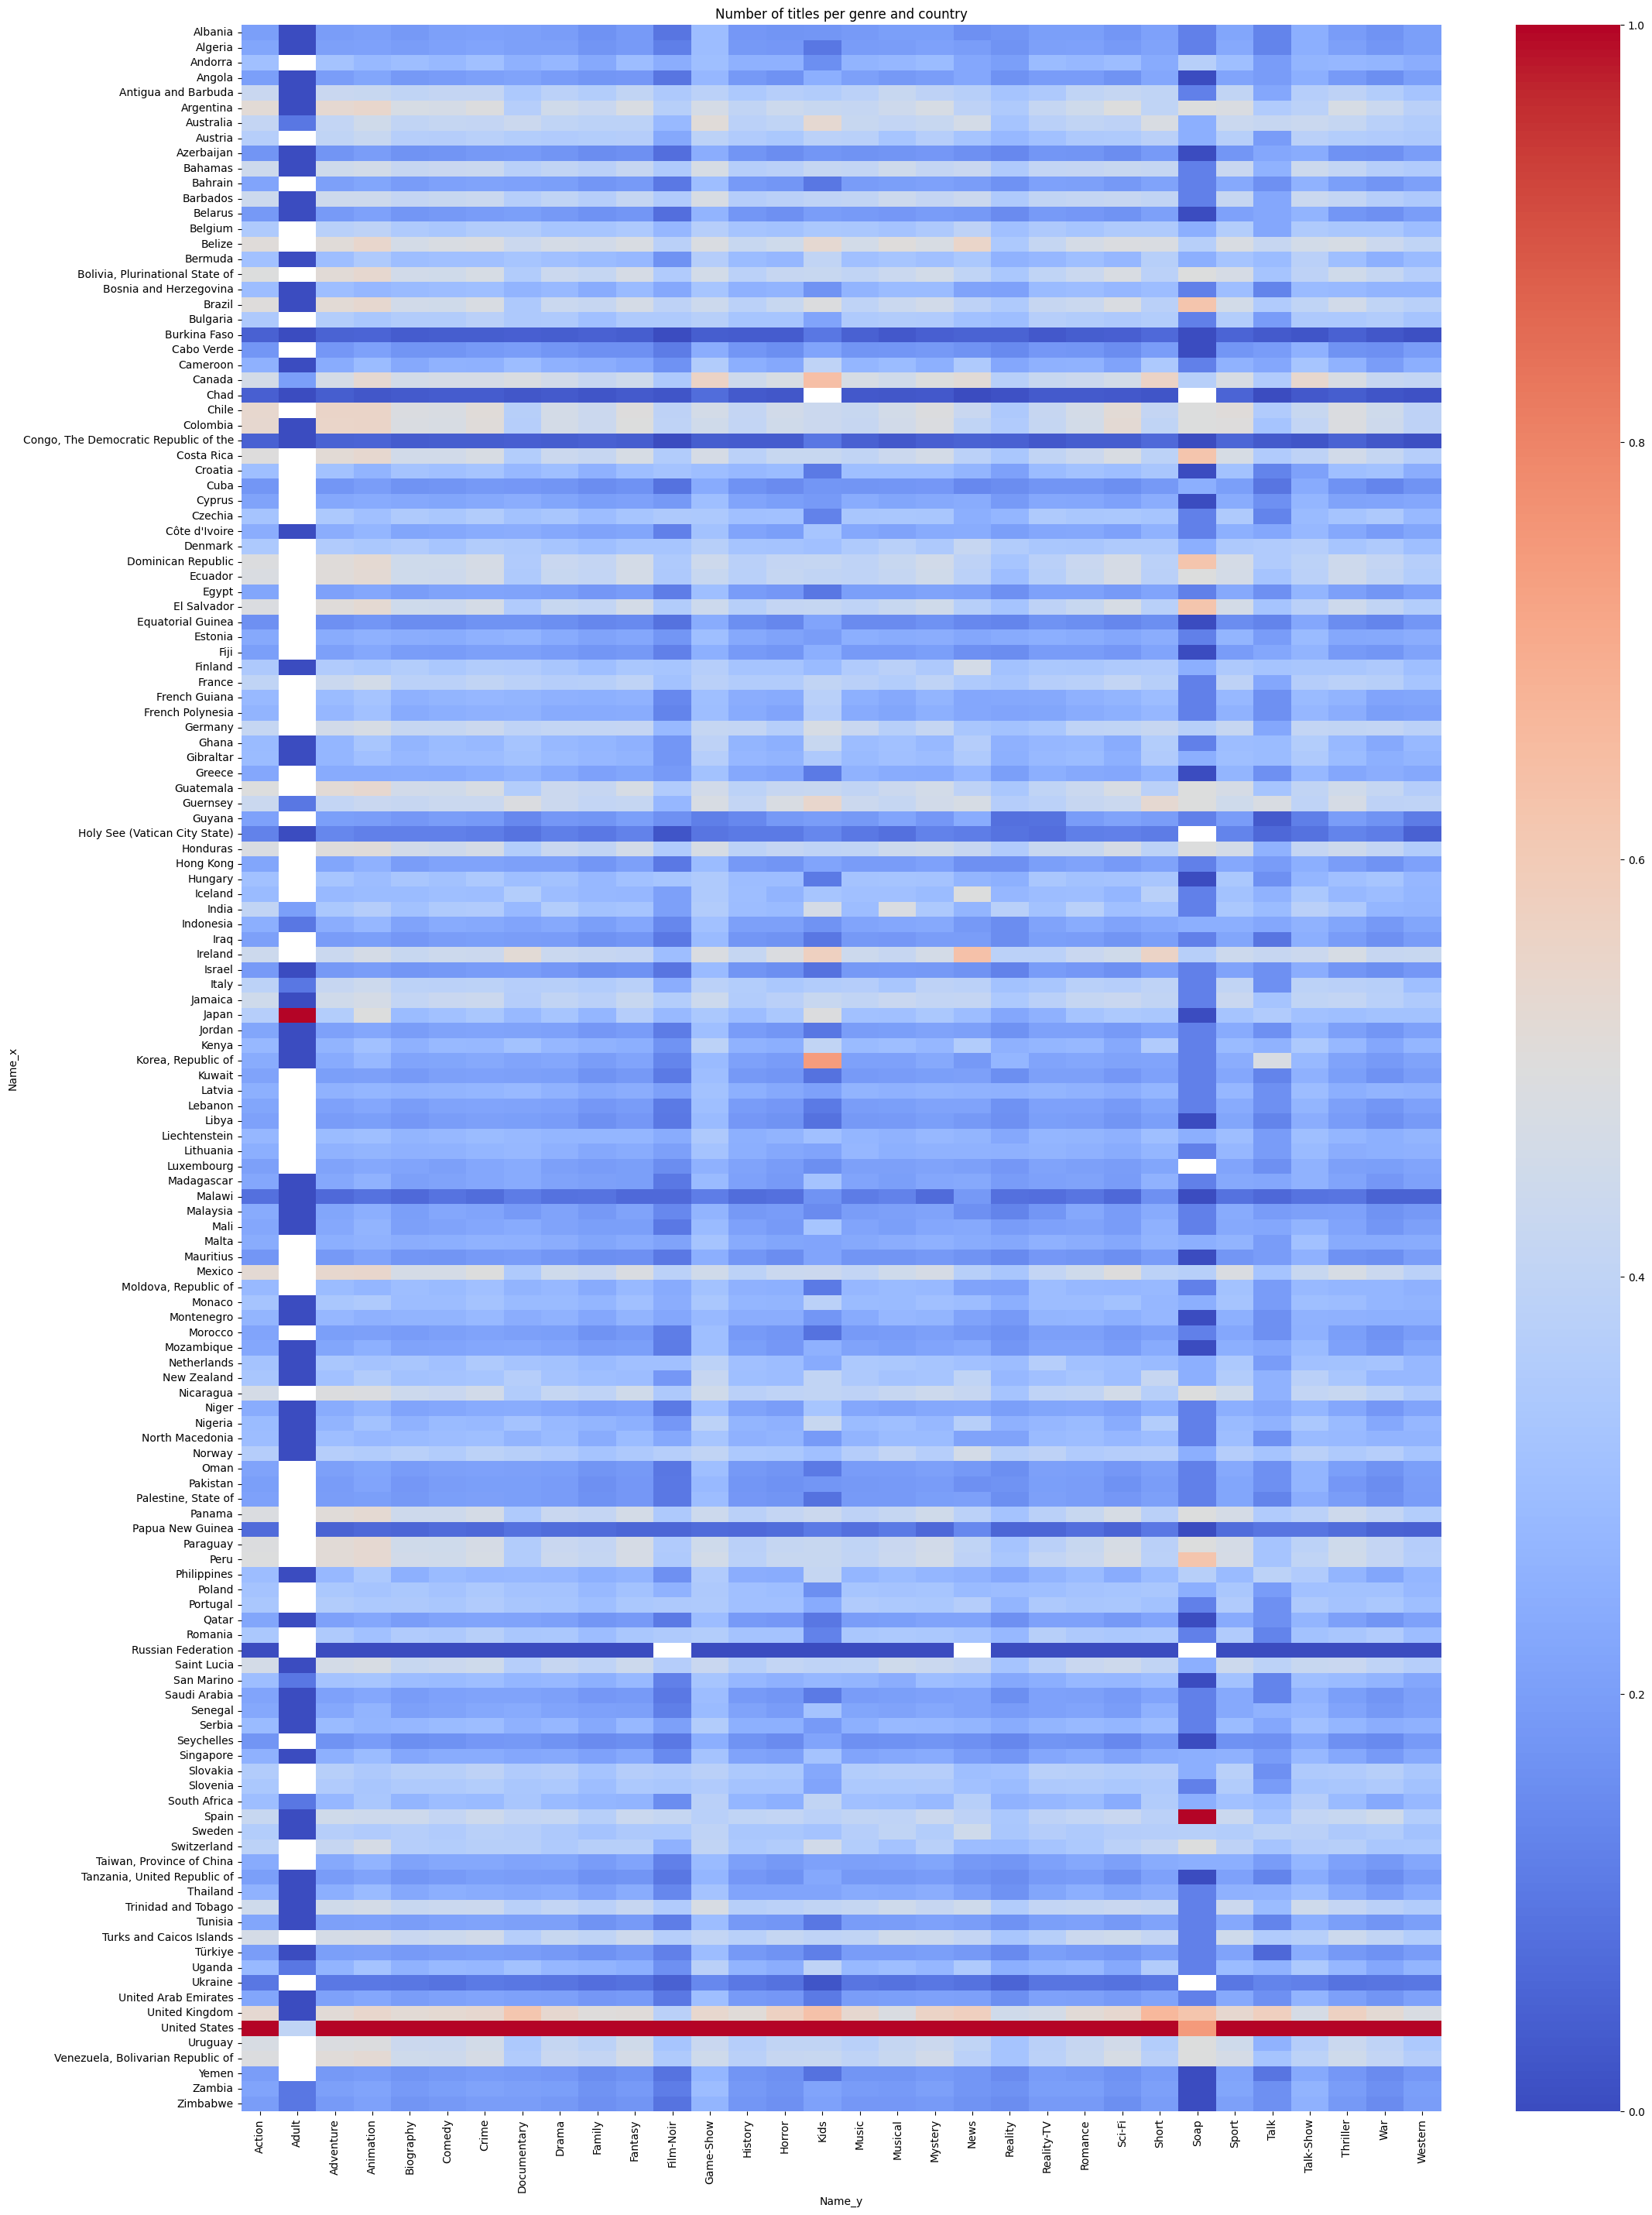

In [ ]:
# Create a heatmap of the normalized crosstab
plt.figure(figsize=(25, 35))
sns.heatmap(crosstab_genre_country_normalized, cmap='coolwarm')
plt.title('Number of titles per genre and country')
plt.show()

Now, we can make some reflexions around this heatmap all the time comparing with United States, because even though we were normalized the data, these had a outliers (United States), for this reason the results of applying the minmax scaler isn't good. 
- Japan is the country with more Adult titles
- Spain is the country with more  Soap titles
- United States have, except Soap and Aduls genre, most titltes than the rest of the countries

# Models

## Recomendation model - SKlearn

In [ ]:
# Create a list of genres that are present in the columns of data_all_platforms_extended
valid_genres_in_data = [genre for genre in genre_values if genre in data_all_platforms_extended.columns]
feature_X = ['imdbNumVotes', 'imdbAverageRating'] + valid_genres_in_data
feature_y = ['title']
data_id_avg_votes = data_all_platforms_extended[feature_X + feature_y]
data_id_avg_votes = data_id_avg_votes.drop_duplicates()
data_id_avg_votes = data_id_avg_votes.dropna()


In [ ]:
# Split the data into training and testing sets
X = data_id_avg_votes[feature_X]
y = data_id_avg_votes[feature_y]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Standardize the features
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)

In [ ]:
# Create the model
movie_recomendation = KNeighborsClassifier(n_neighbors=3)
movie_recomendation.fit(X_train, y_train)

g:\Mi unidad\PROFESSIONAL\Estudis\Data Scientist\Projects\films_and_show_platforms\venv\lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Predict the test set
y_pred = movie_recomendation.predict(X_test)

### Evaluation - SKlearn

In [ ]:
# Calculate the accuracy, precision, and recall
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

g:\Mi unidad\PROFESSIONAL\Estudis\Data Scientist\Projects\films_and_show_platforms\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.00016468134160399627
Precision: 0.00016468134160399627
Recall: 0.00016468134160399627


g:\Mi unidad\PROFESSIONAL\Estudis\Data Scientist\Projects\films_and_show_platforms\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The accuracy of this model is too low, this recomendation model doesn't work correctly. It's possible that the K-neighbors for sklearn doesn't work well for a multilabel (not-binary) target

### Test - SKlearn

In [104]:
# Example function to recommend similar films
def recommend_film(title, num_recommendations=3):
    film_data = data_id_avg_votes[data_id_avg_votes['title'] == title][['imdbNumVotes', 'imdbAverageRating'] + valid_genres_in_data]
    film_data = standard_scaler.transform(film_data)
    distances, indices = movie_recomendation.kneighbors(film_data, n_neighbors=num_recommendations)
    recommended_films = data_id_avg_votes.iloc[indices[0]]['title'].values
    return recommended_films

# Example of making a recommendation
recommended_films = recommend_film('Forrest Gump')
print(f"Films recommended for film ID 1: {recommended_films}")


Films recommended for film ID 1: ['COVID-19: Invasion' 'Open Range' 'The Mysteries of Pittsburgh']


## Recomendation model - Surprise

In [ ]:
# create a fake dataset with user id, movie title and the personal rating using the data_id_avg_votes dataset
dataset_user_rating = pd.DataFrame(columns=['user_id', 'title', 'rating'])
dataset_user_rating['user_id'] = np.random.randint(1, 1000, data_id_avg_votes.shape[0])
dataset_user_rating['rating'] = np.random.randint(1, 11, data_id_avg_votes.shape[0])
dataset_user_rating['title'] = np.random.choice(data_id_avg_votes['title'], data_id_avg_votes.shape[0])



In [129]:
# Prepare the data for the surprise library
reader = Reader(rating_scale=(0, 10))

# Load the data into the surprise library
data_surprise = Dataset.load_from_df(dataset_user_rating, reader)

# Split the data into training and testing sets
trainset, testset = model_selection.train_test_split(data_surprise, test_size=0.2)

# Configure the sim options
sim_options = {'name': 'cosine', 'user_based': False}

# Use the KNNBasic algorithm
knn = KNNBasic(k = 5, sim_options=sim_options)
knn.fit(trainset)
predictions = knn.test(testset)


Computing the cosine similarity matrix...
Done computing similarity matrix.


### Evaluation - Surprise

In [ ]:
# Calculate the RMSE
accuracy_surprise = accuracy.rmse(predictions)
print("RMSE:", accuracy_surprise)

RMSE: 2.9732
RMSE: 2.973233611795309


### Test - Surprise

In [ ]:
# Function to get recommendations for a specific user
def get_recommendations(user_id, num_recommendations=5):
    all_film_titles = dataset_user_rating['title'].tolist()
    already_rated = dataset_user_rating[dataset_user_rating['user_id'] == user_id]['title'].tolist()
    not_rated = [film for film in all_film_titles if film not in already_rated]
    
    predictions = [knn.predict(user_id, film) for film in not_rated]
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)[:num_recommendations]
    
    return [rec.iid for rec in recommendations]

# Example of making a recommendation
recommendations = get_recommendations(user_id=2)
print(f"Recommendations for user 1: {recommendations}")


Recommendations for user 1: ['Fast Foodies', "Nath Valvo: I'm Happy for You", 'The Returned', 'Vinodam', 'Embrace of the Serpent']
